In [2]:
# coding: utf-8
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [4]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [5]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.302530061014362
Xavier:2.315379886603602
He:2.3838170248607886
===========iteration:100===========
std=0.01:2.301852840031418
Xavier:2.2524321156660614
He:1.237027288669577
===========iteration:200===========
std=0.01:2.3032431174081003
Xavier:2.1848221033156356
He:0.7986375550594538
===========iteration:300===========
std=0.01:2.3041498728751
Xavier:1.9660261425370318
He:0.522217235685865
===========iteration:400===========
std=0.01:2.301576035913004
Xavier:1.4458028315672196
He:0.4770918060645578
===========iteration:500===========
std=0.01:2.3073962164291664
Xavier:1.0357672590945226
He:0.3352310014945644
===========iteration:600===========
std=0.01:2.3016753731969333
Xavier:0.6665394192668508
He:0.2868345673883579
===========iteration:700===========
std=0.01:2.29782681018313
Xavier:0.427232048641836
He:0.2270720069529196
===========iteration:800===========
std=0.01:2.3026791896612364
Xavier:0.47720973441214
He:0.3364472282672313
========

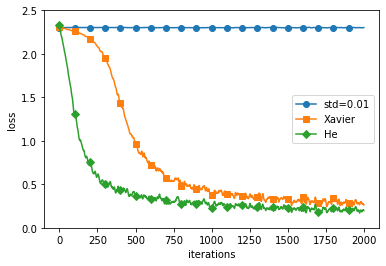

In [6]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()